<h1 style="text-align: center;">MLB Pitcher Comparison</h1>

# Loading Libraries

In [1]:
## pyb stuff
import pybaseball as pyb
from pybaseball import  playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import pitching_stats
from pybaseball import batting_stats
from pybaseball import schedule_and_record

import pandas as pd 
pd.set_option('display.max_columns', None)

import numpy as np

## added yesterday's date so the data we get is updated everytime the statcast data cell is ran
from datetime import date, timedelta, datetime
today = date.today()
yesterday = today - timedelta(days=1)
formatted_date = yesterday.strftime("%Y-%m-%d")

import warnings
warnings.filterwarnings("ignore")

# Loading in the Data

In [2]:
## the code below to run the data takes like 5 1/2 min to run but we get 4 years worth of data
start_date = '2025-03-01'
end_date = '2025-08-01'

statcast_data = pyb.statcast(start_date, end_date)

statcast_data = statcast_data.sort_values(by='game_date').reset_index(drop=True)
statcast_data = statcast_data[~statcast_data['pitch_type'].isna()].sort_values(by='game_date').reset_index(drop=True) ## gets rid of the null pitches
statcast_data.head()

This is a large query, it may take a moment to complete
Skipping offseason dates


100%|██████████| 140/140 [00:41<00:00,  3.35it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-03-15,92.6,-2.77,6.02,"King, Michael",641598,650633,NaN,foul,<NA>,<NA>,<NA>,<NA>,2,Mitch Garver walks.,S,R,R,SEA,SD,S,<NA>,NaN,3,0,2025,-0.59,1.51,0.14,3.14,<NA>,<NA>,<NA>,1,4,Bot,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.626004,-134.466204,-4.754007,-9.068148,30.837838,-13.056356,3.25,1.64,269,80.2,35,91.6,2346,5.9,779000,669134,656582,666703,642180,578428,672359,663604,660757,54.58,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,31,4,4-Seam Fastball,2,2,2,2,2,2,2,2,NaN,NaN,209,0.0,-0.092,<NA>,<NA>,<NA>,0.092,88.0,0,0,0.532,0.532,30,34,30,34,2,1,<NA>,<NA>,<NA>,<NA>,1.17,0.59,0.59,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,SI,2025-03-15,92.3,-2.57,4.53,"Schreiber, John",467793,670167,NaN,ball,<NA>,<NA>,<NA>,<NA>,14,"Carlos Santana grounds into a force out, secon...",S,L,R,KC,CLE,B,<NA>,NaN,2,2,2025,-1.18,-0.19,1.95,1.83,<NA>,<NA>,657041,0,6,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,14.066972,-133.620723,-0.562249,-17.1715,29.634552,-34.514674,3.1,1.56,<NA>,<NA>,<NA>,92.2,2166,6.6,778920,666023,686469,801442,800051,677951,663697,671221,669004,53.92,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,5,Sinker,4,0,0,4,0,4,0,4,Infield shade,Standard,236,0.0,0.115,<NA>,<NA>,<NA>,-0.115,<NA>,4,-4,0.898,0.102,31,39,31,39,1,2,<NA>,<NA>,<NA>,<NA>,2.9,1.18,-1.18,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,FF,2025-03-15,91.9,-2.62,4.63,"Schreiber, John",467793,670167,NaN,foul,<NA>,<NA>,<NA>,<NA>,2,"Carlos Santana grounds into a force out, secon...",S,L,R,KC,CLE,S,<NA>,NaN,2,1,2025,-0.6,1.04,0.26,2.99,<NA>,<NA>,657041,0,6,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.632759,-133.632672,-0.594097,-8.918474,26.54685,-19.663025,3.1,1.56,13,83.7,84,92.7,2273,6.7,778920,666023,686469,801442,800051,677951,663697,671221,669004,53.84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,4,4-Seam Fastball,4,0,0,4,0,4,0,4,Infield shade,Standard,237,0.0,-0.078,<NA>,<NA>,<NA>,0.078,88.0,4,-4,0.898,0.102,31,39,31,39,1,2,<NA>,<NA>,<NA>,<NA>,1.64,0.6,-0.6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,ST,2025-03-15,79.2,-2.79,4.27,"Schreiber, John",467793,670167,NaN,ball,<NA>,<NA>,<NA>,<NA>,14,"Carlos Santana grounds into a force out, secon...",S,L,R,KC,CLE,B,<NA>,NaN,1,1,2025,1.43,-0.03,0.55,1.35,<NA>,<NA>,657041,0,6,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.648587,-115.243381,0.486524,11.891625,21.650798,-32.711002,3.1,1.56,<NA>,<NA>,<NA>,79.6,2490,6.6,778920,666023,686469,801442,800051,677951,663697,671221,669004,53.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,3,Sweeper,4,0,0,4,0,4,0,4,Infield shade,Standard,61,0.0,0

In [3]:
statcast_data.sample()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
370483,FF,2025-06-23,93.6,-2.38,6.07,"Fulmer, Michael",686780,605242,NaN,ball,<NA>,<NA>,<NA>,<NA>,14,Pedro Pagés singles on a line drive to left fi...,R,R,R,STL,CHC,B,<NA>,NaN,1,0,2025,0.21,1.16,1.73,2.07,<NA>,<NA>,<NA>,0,6,Bot,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10.248525,-135.824837,-7.189557,0.369471,28.848331,-16.420539,3.29,1.49,<NA>,<NA>,<NA>,94.6,2433,7.0,777392,608348,457759,663538,807713,621020,664023,691718,663656,53.55,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,48,2,4-Seam Fastball,8,1,8,1,1,8,8,1,Standard,Standard,196,0.0,0.077,<NA>,<NA>,<NA>,-0.077,<NA>,7,7,0.994,0.994,32,26,32,27,1,2,70,2,2,1,1.45,-0.21,-0.21,45.2,<NA>,<NA>,<NA>,<NA>,<NA>


In [4]:
statcast_data['pitch_type'].unique()

array(['FF', 'SI', 'ST', 'CU', 'SL', 'FC', 'FS', 'CH', 'KC', 'SV', 'PO',
       'CS', 'KN', 'FA', 'EP', 'FO', 'SC'], dtype=object)

# Helper Functions

In [5]:
def pitcher_lookup_stats(player_name: str, player_id: int) -> pd.DataFrame:
    """
    Finds all of the pitches for some player from the past 2 seasons
    
    Arguments: player_name: the name of a pitcher (format: Last Name, First Name), player_id: placeholder (unless there's a pitcher with the same name with different ids)
    """
    df = statcast_data[statcast_data['player_name'] == player_name].sort_values(by='game_date').reset_index(drop=True).copy()

    if len(df['pitcher'].unique()) > 1:
        print("There's a pitcher with the same name --> Find out their ID")
        return np.nan
    else:
        pitcher_stats = statcast_data[statcast_data['pitcher'] == df['pitcher'].unique()[0]]

    return pitcher_stats

# EDA

In [6]:
## example use of the `pitcher_lookup_stats` function --> you can just put whatever number in the second parameter (it's a placeholder)
## put in a name that's in the format 'LastName, FirstName' e.g., 'Woo, Bryan'
pitcher_lookup_stats('Woo, Bryan', 0)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
10169,CH,2025-03-18,91.3,-1.24,5.28,"Woo, Bryan",681962,693433,NaN,ball,<NA>,<NA>,<NA>,<NA>,11,Vinny Capra walks.,S,R,R,SEA,MIL,B,<NA>,NaN,0,0,2025,-1.31,0.42,-1.02,3.29,<NA>,<NA>,<NA>,0,3,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3.389417,-132.840828,0.035956,-16.222561,31.157007,-27.482142,3.04,1.53,<NA>,<NA>,<NA>,91.1,2119,6.4,779001,663728,670042,669208,456781,664238,668227,645302,686527,54.12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,17,1,Changeup,0,3,3,0,3,0,3,0,Standard,Standard,217,0.0,0.041,<NA>,<NA>,<NA>,-0.041,<NA>,-3,3,0.195,0.805,25,28,25,29,2,1,<NA>,<NA>,<NA>,<NA>,2.34,1.31,1.31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10191,SL,2025-03-18,84.6,-1.34,5.3,"Woo, Bryan",681962,693433,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,8,Vinny Capra walks.,S,R,R,SEA,MIL,S,<NA>,NaN,1,0,2025,0.06,0.18,-0.2,1.76,<NA>,<NA>,<NA>,0,3,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2.521491,-123.280374,-2.294958,0.154008,23.627023,-30.147202,3.04,1.53,<NA>,<NA>,<NA>,84.7,2177,6.2,779001,663728,670042,669208,456781,664238,668227,645302,686527,54.29,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,17,2,Slider,0,3,3,0,3,0,3,0,Standard,Standard,118,0.0,-0.049,<NA>,<NA>,<NA>,0.049,<NA>,-3,3,0.195,0.805,25,28,25,29,2,1,<NA>,<NA>,<NA>,<NA>,2.99,-0.06,-0.06,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10272,ST,2025-03-18,83.7,-1.38,5.17,"Woo, Bryan",681962,693433,NaN,ball,<NA>,<NA>,<NA>,<NA>,14,Vinny Capra walks.,S,R,R,SEA,MIL,B,<NA>,NaN,1,1,2025,0.99,0.66,1.75,0.72,<NA>,<NA>,<NA>,0,3,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5.264747,-121.607648,-5.063928,8.584219,26.733341,-24.780138,3.04,1.53,<NA>,<NA>,<NA>,83.5,2469,6.5,779001,663728,670042,669208,456781,664238,668227,645302,686527,54.01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,17,3,Sweeper,0,3,3,0,3,0,3,0,Standard,Standard,42,0.0,0.052,<NA>,<NA>,<NA>,-0.052,<NA>,-3,3,0.195,0.805,25,28,25,29,2,1,<NA>,<NA>,<NA>,<NA>,2.63,-0.99,-0.99,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10273,SI,2025-03-18,92.1,-1.29,5.29,"Woo, Bryan",681962,693433,walk,ball,<NA>,<NA>,<NA>,<NA>,11,Vinny Capra walks.,S,R,R,SEA,MIL,B,<NA>,NaN,3,1,2025,-1.26,0.43,-1.33,2.4,<NA>,<NA>,<NA>,0,3,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2.642155,-134.05804,-2.45658,-15.773267,29.395576,-26.629616,3.04,1.53,<NA>,<NA>,<NA>,92.2,2197,6.3,779001,663728,670042,669208,456781,664238,668227,645302,686527,54.16,<NA>,<NA>,0.7,<NA>,0,0,<NA>,17,5,Sinker,0,3,3,0,3,0,3,0,Standard,Standard,220,-0.02,0.26,<NA>,<NA>,<NA>,-0.26,<NA>,-3,3,0.195,0.805,25,28,25,29,2,1,<NA>,<NA>,<NA>,<NA>,2.26,1.26,1.26,<NA>,<N

In [7]:
# Group MLB pitchers by a number of metrics
mlb_pitchers = statcast_data.groupby(['pitcher', 'pitch_name']).agg(pitcher_name = ('player_name', 'max'),
                                                                     handedness = ('p_throws', 'max'),
                                                                     count_pitch = ('player_name', 'count'),
                                                                     spin_rate = ('release_spin_rate', 'mean'),
                                                                     release_speed = ('release_speed', 'mean'), 
                                                                     horz_break = ('pfx_x', 'mean'), 
                                                                     vert_break = ('pfx_z', 'mean'), 
                                                                     extension = ('release_extension', 'mean'), 
                                                                     spin_axis = ('spin_axis', 'mean')
                                                                     ).reset_index()

# Adjust pfx_x and pfx_z to inches (i think?)
mlb_pitchers['horz_break'] = mlb_pitchers['horz_break'] * 12
mlb_pitchers['vert_break'] = mlb_pitchers['vert_break'] * 12
mlb_pitchers

# #Filter for pitches that have been thrown > 30 times
# major_grouped = mlb_pitchers[mlb_pitchers['count_pitch'] > 30].drop(columns = ['count_pitch', 'pitcher'])
# major_grouped

,pitcher,pitch_name,pitcher_name,handedness,count_pitch,spin_rate,release_speed,horz_break,vert_break,extension,spin_axis
0,434378,4-Seam Fastball,"Verlander, Justin",R,758,2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406
1,434378,Changeup,"Verlander, Justin",R,139,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799
2,434378,Curveball,"Verlander, Justin",R,218,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028
3,434378,Slider,"Verlander, Justin",R,391,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432
4,434378,Sweeper,"Verlander, Justin",R,102,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843
...,...,...,...,...,...,...,...,...,...,...,...
4352,829272,4-Seam Fastball,"Ogasawara, Shinnosuke",L,35,2173.657143,90.86,7.494857,15.668571,6.26,142.857143
4353,829272,Changeup,"Ogasawara, Shinnosuke",L,22,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273
4354,829272,Knuckle Curve,"Ogasawara, Shinnosuke",L,28,2720.642857,71.692857,-6.882857,-20.134286,5.964286,342.071429
4355,829272,Slider,"Ogasawara, Shinnosuke",L,23,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304


In [8]:
pitch_type = ['4-Seam Fastball', 'Changeup', 'Slider', 'Curveball', 'Cutter', 'Sinker', 'Split-Finger', 'Sweeper']
features = ['spin_rate', 'release_speed', 'horz_break', 'vert_break', 'extension', 'spin_axis']

In [9]:
# Create pitcher vector dataframe
final_vectors = []
pitcher_names = []

# Loop over each pitcher
for pitcher_name in mlb_pitchers['pitcher_name'].unique():
    pitcher_data = mlb_pitchers[mlb_pitchers['pitcher_name'] == pitcher_name]
    vec = []

    # For each standard pitch type, grab metrics if it exists
    for pt in pitch_type:
        pitch_row = pitcher_data[pitcher_data['pitch_name'] == pt]
        if not pitch_row.empty:
            vals = pitch_row[features].iloc[0].values  # ensure 1D
        else:
            vals = np.zeros(len(features))  # or np.nan
        vec.extend(vals)

    final_vectors.append(vec)
    pitcher_names.append(pitcher_name)

# Step 3: build column names
column_names = []
for pt in pitch_type:
    for f in features:
        column_names.append(f"{pt}_{f}")

# Step 4: create DataFrame
vectors_df = pd.DataFrame(final_vectors, columns=column_names)
vectors_df.insert(0, 'pitcher', pitcher_names)
vectors_df = vectors_df.rename(columns = {'pitcher': 'pitcher_name'})
display(vectors_df)

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis
0,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843
1,"Jansen, Kenley",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2442.714286,83.237143,7.865143,-2.883429,6.825714,76.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2580.986692,92.647529,2.659620,18.760380,6.880608,183.376426,2314.934426,93.150820,-7.904262,18.926557,6.991803,189.688525,0.0,0.0,0.0,0.0,0.0,0.0,2528.478261,81.552174,14.123478,3.699130,6.765217,62.478261
2,"Chavez, Jesse",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1816.923077,83.930769,-15.910769,1.036923,6.264103,255.769231,2408.142857,80.714286,6.085714,-5.485714,6.171429,66.571429,2514.363636,74.209091,15.883636,-7.974545,6.218182,62.181818,2186.587500,87.837500,-1.995000,12.586500,6.203750,213.700000,1979.680556,89.544444,-16.250000,7.381667,6.201389,226.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Hill, Rich",2244.888889,88.523810,4.733333,16.089524,6.574603,149.682540,1432.0,80.5,10.32,3.84,6.6,133.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2569.881356,72.413559,-17.056271,-9.148475,6.337288,304.576271,2288.962963,83.703704,-2.475556,8.404444,6.403704,174.370370,2183.636364,87.236364,15.981818,8.007273,6.545455,138.909091,0.0,0.0,0.0,0.0,0.0,0.0,2492.200000,70.900000,-19.008000,2.376000,6.310000,271.700000
4,"Morton, Charlie",2324.791985,94.182061,-11.838321,12.585115,6.15916,235.807252,1816.372881,87.484746,-13.960678,-3.263729,6.265537,263.824859,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3158.007246,81.380725,15.611130,-9.096522,6.121884,61.821739,2507.294521,88.200685,0.837534,5.498630,6.178767,192.636986,2216.552529,93.987549,-17.788949,4.308794,6.180934,241.210117,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,"Craig, Luke",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2520.000000,80.877778,-6.8,-0.666667,5.944444,285.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2313.545455,92.322727,14.225455,11.001818,5.881818,116.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1021,"Bryant, Tyler",2307.300000,95.205000,-5.412000,14.982000,6.7,206.150000,0.0,0.0,0.0,0.0,0.0,0.0,2425.000000,84.716667,6.6,0.500000,6.583333,100.166667,2272.500000,83.433333,11.800000,-

In [10]:
# Add handedness
mlb_vectors_withhand = vectors_df.merge(mlb_pitchers, on = ['pitcher_name'], how = 'left')
mlb_vectors_withhand = mlb_vectors_withhand.drop(columns = ['pitcher', 'pitch_name', 'spin_rate', 'release_speed',	'horz_break', 'vert_break', 'extension', 'spin_axis'])
mlb_vectors_withhand

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch
0,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,758
1,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,139
2,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,218
3,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,391
4,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,"Ogasawara, Shinnosuke",2173.657143,90.860000,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.139130,6.152174,216.391304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.666667,76.533333,-12.640000,-10.640000,5.933333,320.666667,L,35
4353,"Ogasawara, Shinnosuke",2173.657143,90.860000,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.139130,6.152174,216.391304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.6

In [11]:
trackman = pd.read_csv('../../Files/merged_trackman_games.csv')
trackman

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,Runner1st,Runner2nd,Runner3rd,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,base_state,run_exp,count,delta_run_exp,re24
0,1,2/22/25,05:30.1,1,1,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,0,0,Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.64925,0.432719,1.900443,2037.144708,156.551992,11:15,4.87015,-2.27294,5.37321,-16.36367,18.60084,-7.55091,3.91243,-1.11980,81.94319,-2.683311,0.559518,0.425584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33244,9.52567,2.10803,50.0,4.89779,-4.00496,-131.38274,0.48208,7.51301,29.88203,-15.65521,CSD_TRI,CAL_LAN,UCSanDiego,D1,BW,20250222-UCSanDiego-1,a863ac20-f18a-11ef-9456-e7fd19fa9ca5,88.56641,NaN,NaN,8.70606,NaN,NaN,NaN,NaN,NaN,NaN,f92401d5-ad19-4ab4-801b-f579f4bca033,2/23/25,05:30.1,2025-02-22T18:05:30.0717056-08:00,2025-02-23T02:05:30.0717056Z,NaN,v3,NaN,471762.0,NaN,"Gonzalez, Emiliano",1000081438,Right,CSD_TRI,161a4951-5cb1-4e14-bccc-efd6a6b7a50f,55.12203,-132.54258,14.94101,4.86729,1.08972,-7.82761,2.26914,-4.29657,3.75651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,000/0,0.72,0-0,NaN,-0.0
1,2,2/22/25,05:45.5,1,2,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,1,0,Fastball,Sinker,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.36915,-2.298232,5.488243,1942.903753,126.818131,10:15,4.73413,-2.12090,5.66248,-21.98430,13.10355,-15.85166,0.74802,1.69154,81.89485,-6.411002,2.672846,0.426334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.78292,7.70910,1.66607,50.0,4.52514,-11.85353,-130.49855,-5.99917,16.72644,29.64637,-18.99334,CSD_TRI,CAL_LAN

In [12]:
# Adjust pitch name types to match statcast
def clean_pitch_names(row):
    
    if row['TaggedPitchType'] == 'Splitter':
        row['TaggedPitchType'] = 'Split-Finger'
    if row['TaggedPitchType'] == 'FourSeamFastBall':
        row['TaggedPitchType'] = 'Fastball'
    if row['TaggedPitchType'] == 'ChangeUp':
        row["TaggedPitchType"] = 'Changeup'
    if row['TaggedPitchType'] == 'Fastball':
        row['TaggedPitchType'] = '4-Seam Fastball'
    
    row['HorzBreak'] = row['HorzBreak'] * (-1)
        
    return row

trackman = trackman.apply(clean_pitch_names, axis = 1)
trackman

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,Runner1st,Runner2nd,Runner3rd,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,base_state,run_exp,count,delta_run_exp,re24
0,1,2/22/25,05:30.1,1,1,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,0,0,4-Seam Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.64925,0.432719,1.900443,2037.144708,156.551992,11:15,4.87015,-2.27294,5.37321,-16.36367,18.60084,7.55091,3.91243,-1.11980,81.94319,-2.683311,0.559518,0.425584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33244,9.52567,2.10803,50.0,4.89779,-4.00496,-131.38274,0.48208,7.51301,29.88203,-15.65521,CSD_TRI,CAL_LAN,UCSanDiego,D1,BW,20250222-UCSanDiego-1,a863ac20-f18a-11ef-9456-e7fd19fa9ca5,88.56641,NaN,NaN,8.70606,NaN,NaN,NaN,NaN,NaN,NaN,f92401d5-ad19-4ab4-801b-f579f4bca033,2/23/25,05:30.1,2025-02-22T18:05:30.0717056-08:00,2025-02-23T02:05:30.0717056Z,NaN,v3,NaN,471762.0,NaN,"Gonzalez, Emiliano",1000081438,Right,CSD_TRI,161a4951-5cb1-4e14-bccc-efd6a6b7a50f,55.12203,-132.54258,14.94101,4.86729,1.08972,-7.82761,2.26914,-4.29657,3.75651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,000/0,0.72,0-0,NaN,-0.0
1,2,2/22/25,05:45.5,1,2,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,1,0,4-Seam Fastball,Sinker,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.36915,-2.298232,5.488243,1942.903753,126.818131,10:15,4.73413,-2.12090,5.66248,-21.98430,13.10355,15.85166,0.74802,1.69154,81.89485,-6.411002,2.672846,0.426334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.78292,7.70910,1.66607,50.0,4.52514,-11.85353,-130.49855,-5.99917,16.72644,29.64637,-18.99334,CSD

In [13]:
# Group by ucsd pitcher and various metrics
ucsd = trackman[trackman['PitcherTeam'] == "CSD_TRI"].groupby(['Pitcher', 'TaggedPitchType']).agg(
    handedness = ('PitcherThrows', 'max'),
    count_pitch = ('TaggedPitchType', 'count'),
    release_speed = ('RelSpeed', 'mean'),
    spin_rate = ('SpinRate', 'mean'),
    spin_axis = ('SpinAxis', 'mean'),
    extension = ('Extension', 'mean'),
    vert_break = ('InducedVertBreak', 'mean'),
    horz_break = ('HorzBreak', 'mean')
).reset_index()

ucsd = ucsd[ucsd['count_pitch'] > 8]
ucsd

,Pitcher,TaggedPitchType,handedness,count_pitch,release_speed,spin_rate,spin_axis,extension,vert_break,horz_break
0,"Cazares, Julian",4-Seam Fastball,Left,66,88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465
1,"Cazares, Julian",Changeup,Left,11,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775
4,"Cazares, Julian",Slider,Left,42,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663
9,"Dalquist, Matthew",4-Seam Fastball,Right,390,88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400
10,"Dalquist, Matthew",Changeup,Right,91,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964
...,...,...,...,...,...,...,...,...,...,...
94,"Villar, Jake",Sinker,Left,47,85.483072,2168.623190,123.516458,5.156891,10.306133,13.589755
95,"Villar, Jake",Slider,Left,142,78.654628,2188.153356,277.418471,4.770237,-0.179325,-8.444508
96,"Villar, Jake",Sweeper,Left,24,78.741176,2277.967680,276.632578,5.070667,0.548352,-10.121163
97,"Weber, Chapman",4-Seam Fastball,Right,236,89.697219,2265.244352,203.660116,5.122914,23.956657,-10.018547


In [14]:
pitch_type_ucsd = list(ucsd['TaggedPitchType'].unique())
print(pitch_type_ucsd)
features_ucsd = ['release_speed', 'spin_rate', 'spin_axis', 'extension', 'vert_break', 'horz_break']

['4-Seam Fastball', 'Changeup', 'Slider', 'Curveball', 'Cutter', 'Sinker', 'Split-Finger', 'Sweeper']


In [15]:
final_vectors = []
pitcher_names = []

# Loop over each pitcher
for pitcher_name in ucsd['Pitcher'].unique():
    pitcher_data = ucsd[ucsd['Pitcher'] == pitcher_name]
    vec = []

    # For each standard pitch type, grab metrics if it exists
    for pt in pitch_type_ucsd:
        pitch_row = pitcher_data[pitcher_data['TaggedPitchType'] == pt]
        if not pitch_row.empty:
            vals = pitch_row[features_ucsd].iloc[0].values  # ensure 1D
        else:
            vals = np.zeros(len(features))  # or np.nan
        vec.extend(vals)

    final_vectors.append(vec)
    pitcher_names.append(pitcher_name)

# Step 3: build column names
column_names = []
for pt in pitch_type_ucsd:
    for f in features_ucsd:
        column_names.append(f"{pt}_{f}")

# Step 4: create DataFrame
ucsd_vectors = pd.DataFrame(final_vectors, columns=column_names)
ucsd_vectors.insert(0, 'pitcher', pitcher_names)
ucsd_vectors

,pitcher,4-Seam Fastball_release_speed,4-Seam Fastball_spin_rate,4-Seam Fastball_spin_axis,4-Seam Fastball_extension,4-Seam Fastball_vert_break,4-Seam Fastball_horz_break,Changeup_release_speed,Changeup_spin_rate,Changeup_spin_axis,Changeup_extension,Changeup_vert_break,Changeup_horz_break,Slider_release_speed,Slider_spin_rate,Slider_spin_axis,Slider_extension,Slider_vert_break,Slider_horz_break,Curveball_release_speed,Curveball_spin_rate,Curveball_spin_axis,Curveball_extension,Curveball_vert_break,Curveball_horz_break,Cutter_release_speed,Cutter_spin_rate,Cutter_spin_axis,Cutter_extension,Cutter_vert_break,Cutter_horz_break,Sinker_release_speed,Sinker_spin_rate,Sinker_spin_axis,Sinker_extension,Sinker_vert_break,Sinker_horz_break,Split-Finger_release_speed,Split-Finger_spin_rate,Split-Finger_spin_axis,Split-Finger_extension,Split-Finger_vert_break,Split-Finger_horz_break,Sweeper_release_speed,Sweeper_spin_rate,Sweeper_spin_axis,Sweeper_extension,Sweeper_vert_break,Sweeper_horz_break
0,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,"Dalquist, Matthew",88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964,82.720486,2447.634032,113.902140,5.161007,3.741759,5.824260,74.926023,2459.541861,44.089341,5.139454,-10.852446,12.105688,83.199194,2488.615077,125.433412,5.413208,5.026725,5.189934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,"Davidson, Garrett",85.661506,2146.994880,154.427683,4.903740,15.957478,7.336815,77.308087,1515.452132,95.027869,4.959643,2.559521,14.410717,74.155766,2276.647706,280.535485,4.491794,-5.350577,-9.668084,71.310709,2357.390834,291.703567,4.155051,-8.962203,-14.695104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,"Ernisse, Zach",88.736867,2188.778474,164.486918,5.927394,23.291826,6.075582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.042626,2379.753928,276.029631,5.293233,0.234685,-6.669285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,"Gregson, Niccolas",89.617333,2255.416915,197.737886,6.341022,18.939651,-5.994221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.411034,2528.056539,115.903588,5.903371,3.448766,2.824657,74.969531,2815.166014,32.382876,5.745636,-15.135522,8.280808,84.007924,2394.278370,179.781303,6.390396,8.141304,-0.327554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,"Hasegawa, Sam",89.421907,2416.848309,184.654447,5.663910,10.826143,-0.400802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.452536,2502.029758,283.178014,5.508476,-1.787087,-9.056739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.132758,2406.797889,187.684837,6.128570,11.572052,-1.267020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,"Huy, Nathan",85.530805,1922.655264,180.828451,5.413591,12.213211,0.511295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.788416,2253.

In [16]:
ucsd_vectors_withhand = ucsd_vectors.merge(ucsd, left_on = 'pitcher', right_on = 'Pitcher', how = 'left')
ucsd_vectors_withhand = ucsd_vectors_withhand.drop(columns = ['TaggedPitchType', 'Pitcher', 'count_pitch', 'release_speed', 'spin_rate', 'spin_axis', 'extension', 'vert_break', 'horz_break'])
ucsd_vectors_withhand

,pitcher,4-Seam Fastball_release_speed,4-Seam Fastball_spin_rate,4-Seam Fastball_spin_axis,4-Seam Fastball_extension,4-Seam Fastball_vert_break,4-Seam Fastball_horz_break,Changeup_release_speed,Changeup_spin_rate,Changeup_spin_axis,Changeup_extension,Changeup_vert_break,Changeup_horz_break,Slider_release_speed,Slider_spin_rate,Slider_spin_axis,Slider_extension,Slider_vert_break,Slider_horz_break,Curveball_release_speed,Curveball_spin_rate,Curveball_spin_axis,Curveball_extension,Curveball_vert_break,Curveball_horz_break,Cutter_release_speed,Cutter_spin_rate,Cutter_spin_axis,Cutter_extension,Cutter_vert_break,Cutter_horz_break,Sinker_release_speed,Sinker_spin_rate,Sinker_spin_axis,Sinker_extension,Sinker_vert_break,Sinker_horz_break,Split-Finger_release_speed,Split-Finger_spin_rate,Split-Finger_spin_axis,Split-Finger_extension,Split-Finger_vert_break,Split-Finger_horz_break,Sweeper_release_speed,Sweeper_spin_rate,Sweeper_spin_axis,Sweeper_extension,Sweeper_vert_break,Sweeper_horz_break,handedness
0,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Left
1,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Left
2,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Left
3,"Dalquist, Matthew",88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964,82.720486,2447.634032,113.902140,5.161007,3.741759,5.824260,74.926023,2459.541861,44.089341,5.139454,-10.852446,12.105688,83.199194,2488.615077,125.433412,5.413208,5.026725,5.189934,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Right
4,"Dalquist, Matthew",88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964,82.720486,2447.634032,113.902140,5.161007,3.741759,5.824260,74.926023,2459.541861,44.089341,5.139454,-10.852446,12.105688,83.199194,2488.615077,125.433412,5.413208,5.026725,5.189934,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,"Villar, Jake",85.682666,2159.920294,147.640075,5.568090,12.602043,6.992488,77.891877,1584.741558,128.733564,5.510417,8.661711,10.245849,78.654628,2188.153356,277.418471,4.770237,-0.179325,-8.444508,77.251492,1995.569223,289.249605,4.506115,-7.865252,-9.168466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.483072,2168.62319,123.516458,5.156891,10.306133,13.589755,0.0,0.0,0.0,0.0,0.0,0.0,78.741176,2277.96768,276.632578,5.070667,0.548352,-10.121163,Left
57,"Villar, Jake",85.682666,2159.920294,147.640075,

In [17]:
mlb_vectors_withhand

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch
0,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,758
1,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,139
2,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,218
3,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,391
4,"Verlander, Justin",2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2633.450980,79.960784,12.329412,-1.903529,6.089216,48.607843,R,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,"Ogasawara, Shinnosuke",2173.657143,90.860000,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.139130,6.152174,216.391304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.666667,76.533333,-12.640000,-10.640000,5.933333,320.666667,L,35
4353,"Ogasawara, Shinnosuke",2173.657143,90.860000,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.139130,6.152174,216.391304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.6

In [18]:
# Encode handedness for KNN model (Left = 0, Right = 1)
def encode_handedness(row):
    
    if (row['handedness'] == 'R') | (row['handedness'] == 'Right'):
        row['handedness'] = 1
    if (row['handedness'] == 'L') | (row['handedness'] == 'Left'):
        row['handedness'] = 0
        
    return row

mlb_vectors_withhand = mlb_vectors_withhand.apply(encode_handedness, axis = 1).copy().drop_duplicates(subset = 'pitcher_name').sort_values(by = 'count_pitch', ascending = False)
mlb_vectors_withhand = mlb_vectors_withhand[mlb_vectors_withhand['count_pitch'] > 25]
ucsd_vectors_withhand = ucsd_vectors_withhand.apply(encode_handedness, axis = 1).copy().drop_duplicates(subset = 'pitcher')
display(mlb_vectors_withhand)

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch
1156,"Peralta, Freddy",2452.798367,94.992898,-4.683527,16.818612,6.83951,207.870204,1892.288939,89.167494,-16.638014,3.755485,6.791874,245.485327,2490.240642,84.140107,5.712513,5.566845,6.791444,85.192513,2364.395137,79.649848,5.276353,-5.686322,6.784802,58.629179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1225
343,"Gausman, Kevin",2257.166667,94.247094,-11.231487,17.111487,6.597436,218.243590,0.0,0.0,0.0,0.0,0.0,0.0,2351.561798,82.704494,1.781124,1.390787,6.544382,128.932584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2199.333333,92.233333,-18.360000,17.400000,6.500000,220.000000,1744.061481,84.977917,-15.987854,4.515885,6.686073,237.495609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1170
359,"Ray, Robbie",2362.186170,93.544592,8.321915,18.364149,6.170124,147.687943,1656.433022,84.866355,11.518879,11.682991,6.125545,152.489097,2273.477099,87.901527,0.660458,8.878168,6.125573,148.847328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2206.416667,80.000000,-10.140000,-4.540000,5.916667,317.833333,0,1128
2072,"Gore, MacKenzie",2267.577301,95.325827,6.312386,17.054799,6.887042,147.689008,2071.310185,86.146759,13.746667,8.51,7.027315,121.287037,2120.222672,86.478138,-1.817976,1.950121,6.859919,255.408907,2354.267420,81.386629,-5.047458,-13.451977,6.842561,337.188324,1988.265306,90.368367,-0.651429,7.823265,6.879592,154.183673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1119
889,"Senzatela, Antonio",2213.483901,94.844526,-4.466053,11.609752,6.104048,210.970561,2195.115646,87.306122,-9.22449,7.045714,6.070748,212.659864,2296.853774,86.683962,4.695566,3.129057,5.954953,153.169811,2473.498127,80.152434,5.823820,-5.934382,5.906367,65.063670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2209.410959,95.012329,-9.720000,12.705205,6.134247,215.958904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,"Gibson, Kyle",2265.230769,91.519231,-5.510769,16.527692,6.865385,212.846154,1745.611111,85.427778,-13.206667,4.213333,7.033333,225.388889,2497.600000,83.280000,4.224,-3.024000,6.860000,81.200000,2453.064516,78.787097,7.931613,-10.544516,6.912903,48.516129,2367.103448,87.544828,3.806897,6.442759,6.900000,172.206897,2070.500000,90.

### K-Nearest Neighbors Model

In [19]:
from sklearn.preprocessing import StandardScaler

x_ucsd = ucsd_vectors_withhand.drop(columns = ['pitcher']).fillna(0)
x_mlb = mlb_vectors_withhand.drop(columns = ['pitcher_name', 'count_pitch']).fillna(0)
scaler = StandardScaler()
x_all = pd.concat([x_ucsd, x_mlb], axis = 0).fillna(0)
x_all_scaled = scaler.fit_transform(x_all)

x_mlb_scaled = x_all_scaled[:len(x_mlb)]
x_ucsd_scaled = x_all_scaled[len(x_mlb):]

In [20]:
display(x_mlb_scaled)

array([[-0.0142186 , -0.03551726, -0.38146785, ..., -0.13330934,
        -0.35778144, -1.70084013],
       [ 0.00614605,  0.4678842 ,  0.30060229, ..., -0.13330934,
        -0.35778144,  0.58794474],
       [-0.14266297, -0.04359399, -0.56469871, ..., -0.13330934,
        -0.35778144, -1.70084013],
       ...,
       [ 0.40254529,  0.07803431,  0.56553209, ..., -0.13330934,
        -0.35778144,  0.58794474],
       [ 0.12403388,  0.3376172 , -0.9150154 , ...,  1.31072605,
        -1.75380329, -1.70084013],
       [ 0.20554138, -0.32360558,  0.6731873 , ..., -0.33669461,
         0.34427985,  0.58794474]], shape=(635, 49))

In [21]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 10, metric = 'euclidean')
knn.fit(x_mlb_scaled)

distances, indices = knn.kneighbors(x_ucsd_scaled)

results = []

for i, (dists, idxs) in enumerate(zip(distances, indices)):
    team_pitcher = ucsd_vectors_withhand.iloc[i]['pitcher']
    for rank, (dist, idx) in enumerate(zip(dists, idxs), start=1):
        mlb_pitcher = mlb_vectors_withhand.iloc[idx]['pitcher_name']
        results.append({
            'Team Pitcher': team_pitcher,
            'Similar MLB Pitcher': mlb_pitcher,
            'Similarity Rank': rank,
            'Distance': dist
        })

top10_df = pd.DataFrame(results)
top10_df[top10_df['Similarity Rank'] == 1]

,Team Pitcher,Similar MLB Pitcher,Similarity Rank,Distance
0,"Cazares, Julian","Otañez, Michel",1,1.517576e+00
10,"Dalquist, Matthew","Freeman, Caleb",1,2.443584e+00
20,"Davidson, Garrett","Barnes, Jacob",1,1.756657e+00
30,"Ernisse, Zach","Henriquez, Ronny",1,1.429252e+00
40,"Gregson, Niccolas","Walker, Josh",1,3.418349e+00
50,"Hasegawa, Sam","Henry, Cole",1,3.655436e+00
60,"Huy, Nathan","Stanek, Ryne",1,4.153183e+00
70,"King, Devon","Estrada, Lazaro",1,1.094909e+00
80,"Marchetti, Landon","Gillaspie, Logan",1,2.519505e+00
90,"Murdock, Steele","Tinoco, Jesus",1,3.677360e+00


In [22]:
def find_similar_pitchers(
    team_df: pd.DataFrame,
    mlb_df: pd.DataFrame,
    team_vectors_df: pd.DataFrame,
    mlb_vectors_df: pd.DataFrame,
    team_pitcher_name: str,
    n_neighbors: int = 3
) -> pd.DataFrame:
    
    
   # Get rid of duplicates in team_df
    
   # --- 1. Get pitch types for the team pitcher
    team_pitch_types = set(team_df[team_df['Pitcher'] == team_pitcher_name]['TaggedPitchType'].unique())

    # --- 2. Map MLB pitchers to their pitch types
    mlb_pitch_types_by_pitcher = mlb_df.groupby('pitcher_name')['pitch_name'].apply(set).to_dict()

    # --- 3. Filter MLB pitchers who throw at least all the same pitch types
    compatible_mlb_pitchers = [
        p for p, pitches in mlb_pitch_types_by_pitcher.items()
        if team_pitch_types.issubset(pitches)
    ]

    # --- 4. Subset MLB vectors to compatible pitchers
    mlb_filtered_vectors = mlb_vectors_df[mlb_vectors_df['pitcher_name'].isin(compatible_mlb_pitchers)]
    if mlb_filtered_vectors.empty:
        raise ValueError(f"No MLB pitchers found with compatible pitch types for {team_pitcher_name}.")
    

    # --- 5. Get team vector
    team_vector_row = team_vectors_df[team_vectors_df['pitcher'] == team_pitcher_name].fillna(0)
    if team_vector_row.empty:
        raise ValueError(f"Pitcher '{team_pitcher_name}' not found in team_vectors_df.")
    team_vector = team_vector_row.drop(columns='pitcher').values
    
    
    # ---- Filter for handedness
    handedness = team_vector_row['handedness'].iloc[0]
    mlb_filtered_hand = mlb_filtered_vectors[mlb_filtered_vectors['handedness'] == handedness].fillna(0)
    if mlb_filtered_hand.empty:
        raise ValueError(f"No MLB pitchers found with compatible pitch types for {team_pitcher_name}.")
    
    print("MLB vector columns:", mlb_filtered_hand.columns.tolist())
    print("Team vector columns:", team_vector_row.columns.tolist())

    # --- 6. Scale both MLB and team vectors
    X_mlb = mlb_filtered_hand.drop(columns=['pitcher_name', 'count_pitch']).values
    X_all = np.vstack([X_mlb, team_vector])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_all)
    X_mlb_scaled = X_scaled[:-1]
    X_team_scaled = X_scaled[-1].reshape(1, -1)

    # --- 7. Fit KNN
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(X_mlb_scaled)
    distances, indices = knn.kneighbors(X_team_scaled)

    # --- 8. Return results
    similar_pitchers = mlb_filtered_hand.iloc[indices[0]].copy()
    similar_pitchers['distance'] = distances[0]
    
    return similar_pitchers.reset_index(drop=True)




weber_comparison = find_similar_pitchers(
    team_df = ucsd,
    mlb_df = mlb_pitchers,
    team_vectors_df=  ucsd_vectors_withhand,
    mlb_vectors_df = mlb_vectors_withhand,
    team_pitcher_name='Weber, Chapman',
    n_neighbors = 15
)

display(weber_comparison)

MLB vector columns: ['pitcher_name', '4-Seam Fastball_spin_rate', '4-Seam Fastball_release_speed', '4-Seam Fastball_horz_break', '4-Seam Fastball_vert_break', '4-Seam Fastball_extension', '4-Seam Fastball_spin_axis', 'Changeup_spin_rate', 'Changeup_release_speed', 'Changeup_horz_break', 'Changeup_vert_break', 'Changeup_extension', 'Changeup_spin_axis', 'Slider_spin_rate', 'Slider_release_speed', 'Slider_horz_break', 'Slider_vert_break', 'Slider_extension', 'Slider_spin_axis', 'Curveball_spin_rate', 'Curveball_release_speed', 'Curveball_horz_break', 'Curveball_vert_break', 'Curveball_extension', 'Curveball_spin_axis', 'Cutter_spin_rate', 'Cutter_release_speed', 'Cutter_horz_break', 'Cutter_vert_break', 'Cutter_extension', 'Cutter_spin_axis', 'Sinker_spin_rate', 'Sinker_release_speed', 'Sinker_horz_break', 'Sinker_vert_break', 'Sinker_extension', 'Sinker_spin_axis', 'Split-Finger_spin_rate', 'Split-Finger_release_speed', 'Split-Finger_horz_break', 'Split-Finger_vert_break', 'Split-Finger

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch,distance
0,"Pallante, Andre",2295.349330,94.382701,-0.410625,10.115223,6.512946,185.060268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2408.535519,87.607832,4.801530,-0.503825,6.616940,107.009107,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2191.012000,94.875200,-10.419360,13.558560,6.513600,194.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,896,44.931245
1,"Sasaki, Roki",2080.224080,96.013712,-10.551973,14.316923,7.074247,226.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1868.554455,82.046535,11.698218,-2.307327,7.016832,44.534653,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,482.55102,84.794898,-0.821633,-3.903673,7.167347,306.887755,0.0,0.0,0.0,0.0,0.0,0.0,1,299,44.936135
2,"Junis, Jakob",2120.648649,90.683784,-4.829189,13.368649,6.156757,218.270270,1281.278571,86.036429,-11.489143,2.438571,6.065714,228.107143,2461.760638,82.843351,11.708617,3.190851,5.884043,65.601064,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2104.385827,90.919291,-15.047717,5.719370,6.119291,218.129921,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,37,44.966649
3,"Mejia, Juan",2586.951220,96.251220,-1.388195,12.292390,6.190244,201.995122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2815.789256,82.912810,13.707273,-1.378512,6.083471,62.061983,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,410,45.085424
4,"Church, Marc",2129.821429,96.291071,-2.727857,17.940000,6.816071,197.053571,1654.571429,91.442857,-11.897143,10.217143,6.757143,201.714286,2086.745763,87.181356,2.212881,5.162034,6.767797,177.016949,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,56,45.221701
5,"Estévez, Carlos",2160.102190,95.277129,-7.836496,17.281168,6.276156,207.532847,1611.500000,87.209375,-11.687812,9.060938,6.349219,232.289062,2205.639216,87.470588,5.589647,3.320941,6.121569,150.690196,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,411,45.238588
6,"Dana, Caden",2071.158730,94.101587,-8.510476,17.720000,6.673016,210.031746,1376.206897,86.358621,-12.674483,6.835862,6.603448,239.172414,2105.050000,84.140000,6.738000,-1.902000,6.465000,86.150000,2161.857143,76.985714,3.600,-17.622857

## Plotting Pitch Plots

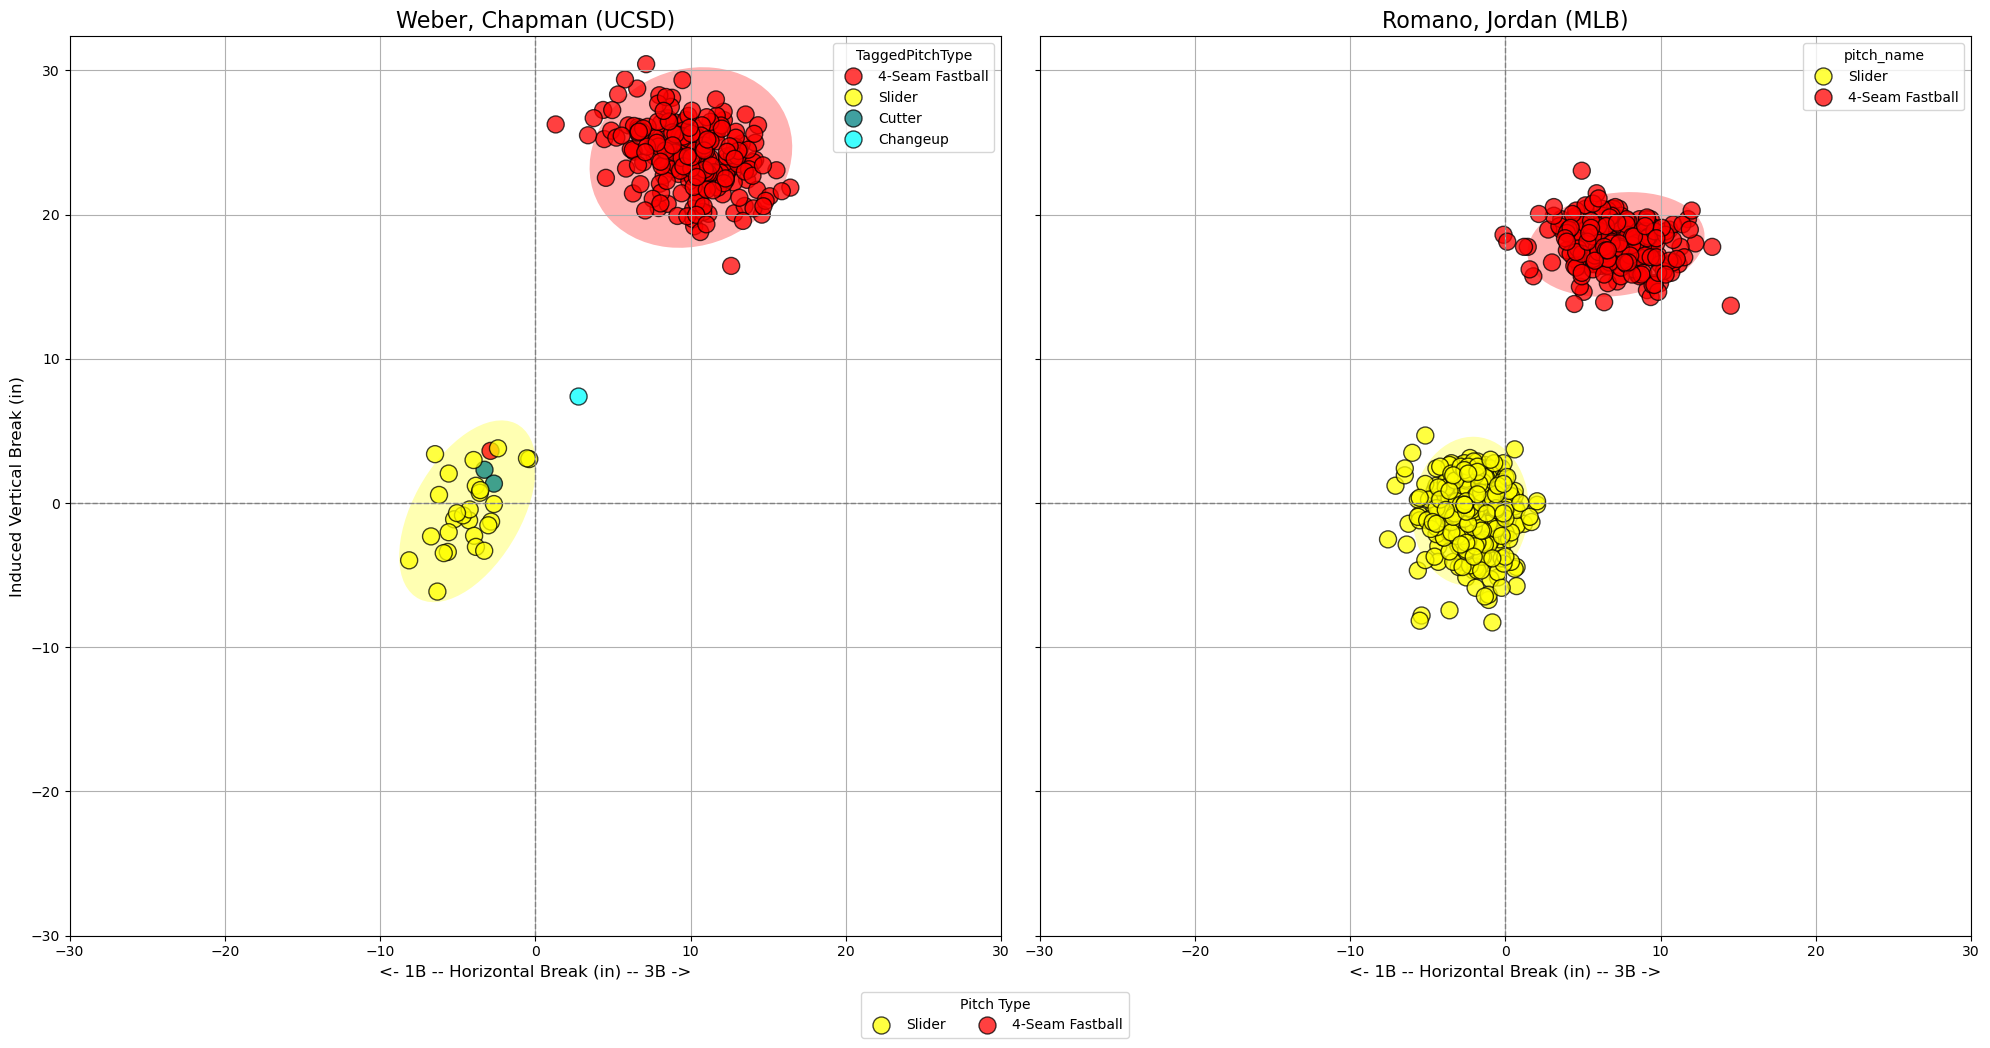

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

def compare_pitchers(ucsd_pitcher, mlb_pitcher, trackman, statcast_data):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

    color_map = {
        '4-Seam Fastball': 'red',
        'Sinker': 'darkorange',
        'Changeup': 'cyan',
        'Slider': 'yellow',
        'Curveball': 'green',
        'Split-Finger': 'brown',
        'Other': 'gray',
        'Sweeper': 'purple',
        'Cutter': 'teal',
        'Screwball': 'pink',
        'Pitch Out': 'white',
        'Knuckleball': 'white',
        'TwoSeamFastBall': 'white',
        'Undefined': 'white',
        'Knuckle Curve': 'white',
        'Slurve': 'white',
        'Slow Curve': 'white'
    }

    def draw_ellipse(data, ax, color, label=None):
        if len(data) < 5:
            return
        data = np.array(data, dtype=float)
        cov = np.cov(data.T)
        mean = np.mean(data, axis=0)
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        scale_factor = 2.45  # 95% confidence
        ell = Ellipse(
            xy=mean,
            width=scale_factor * lambda_[0] * 2,
            height=scale_factor * lambda_[1] * 2,
            angle=np.rad2deg(np.arccos(v[0, 0])),
            edgecolor=color,
            facecolor=color,
            alpha=0.3,
            lw=0,
            zorder=0
        )
        ax.add_patch(ell)

    # ---- UCSD Pitcher ----
    ucsd_df = trackman[trackman['Pitcher'] == ucsd_pitcher][['TaggedPitchType', 'InducedVertBreak', 'HorzBreak']].copy()
    ucsd_df['HorzBreak'] = ucsd_df['HorzBreak'] * (-1)
    ax1 = axes[0]
    sns.scatterplot(
        data=ucsd_df, x='HorzBreak', y='InducedVertBreak',
        hue='TaggedPitchType', palette=color_map,
        edgecolor='black', s=150, alpha=0.75, ax=ax1, zorder=1
    )
    for pitch_type, color in color_map.items():
        group = ucsd_df[ucsd_df['TaggedPitchType'] == pitch_type]
        coords = group[['HorzBreak', 'InducedVertBreak']].dropna().to_numpy()
        draw_ellipse(coords, ax1, color)

    ax1.set_title(f"{ucsd_pitcher} (UCSD)", fontsize=16)
    ax1.set_xlabel("<- 1B -- Horizontal Break (in) -- 3B ->", fontsize=12)
    ax1.set_ylabel("Induced Vertical Break (in)", fontsize=12)
    ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax1.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax1.set_xticks(range(-30, 31, 10))
    ax1.set_yticks(range(-30, 31, 10))
    ax1.grid(True)

    # ---- MLB Pitcher ----
    mlb_df = statcast_data[statcast_data['player_name'] == mlb_pitcher][['pitch_name', 'pfx_z', 'pfx_x']].copy()
    mlb_df['pfx_z'] = mlb_df['pfx_z'] * 12
    mlb_df['pfx_x'] = mlb_df['pfx_x'] * (-12)
    mlb_df = mlb_df.dropna(subset=['pitch_name'])
    ax2 = axes[1]
    sns.scatterplot(
        data=mlb_df, x='pfx_x', y='pfx_z',
        hue='pitch_name', palette=color_map,
        edgecolor='black', s=150, alpha=0.75, ax=ax2, zorder=1
    )
    for pitch_type, color in color_map.items():
        group = mlb_df[mlb_df['pitch_name'] == pitch_type]
        coords = group[['pfx_x', 'pfx_z']].dropna().to_numpy()
        draw_ellipse(coords, ax2, color)

    ax2.set_title(f"{mlb_pitcher} (MLB)", fontsize=16)
    ax2.set_xlabel("<- 1B -- Horizontal Break (in) -- 3B ->", fontsize=12)
    ax2.set_ylabel("Induced Vertical Break (in)", fontsize=12)
    ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax2.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax2.set_xticks(range(-30, 31, 10))
    ax2.set_yticks(range(-30, 31, 10))
    ax2.grid(True)

    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, title='Pitch Type', loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05))
    plt.tight_layout()
    plt.show()


compare_pitchers('Weber, Chapman', 'Romano, Jordan', trackman, statcast_data)

## Calculating Usage Rates & Other Metrics (MLB)

In [24]:
mlb_pitchers.head()

,pitcher,pitch_name,pitcher_name,handedness,count_pitch,spin_rate,release_speed,horz_break,vert_break,extension,spin_axis
0,434378,4-Seam Fastball,"Verlander, Justin",R,758,2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406
1,434378,Changeup,"Verlander, Justin",R,139,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799
2,434378,Curveball,"Verlander, Justin",R,218,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028
3,434378,Slider,"Verlander, Justin",R,391,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432
4,434378,Sweeper,"Verlander, Justin",R,102,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843


In [25]:
total_pitches = mlb_pitchers.groupby(['pitcher_name'])[['count_pitch']].sum().reset_index()
total_pitches = total_pitches.rename(columns = {'count_pitch': 'total_pitches'})
mlb_pitchers_master = mlb_pitchers.merge(total_pitches, on = ['pitcher_name'], how = 'left')
mlb_pitchers_master['usage%'] = round((mlb_pitchers_master['count_pitch'] / mlb_pitchers_master['total_pitches']) * 100, 1)
mlb_pitchers_master

,pitcher,pitch_name,pitcher_name,handedness,count_pitch,spin_rate,release_speed,horz_break,vert_break,extension,spin_axis,total_pitches,usage%
0,434378,4-Seam Fastball,"Verlander, Justin",R,758,2432.229551,94.104617,-9.006016,18.533984,6.101055,207.774406,1608,47.1
1,434378,Changeup,"Verlander, Justin",R,139,1726.136691,84.984892,-13.234532,9.068201,6.135971,230.251799,1608,8.6
2,434378,Curveball,"Verlander, Justin",R,218,2736.582569,78.744954,7.651376,-11.826606,6.066514,40.633028,1608,13.6
3,434378,Slider,"Verlander, Justin",R,391,2486.306905,87.554731,3.802558,5.991407,6.112276,169.841432,1608,24.3
4,434378,Sweeper,"Verlander, Justin",R,102,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,1608,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,829272,4-Seam Fastball,"Ogasawara, Shinnosuke",L,35,2173.657143,90.86,7.494857,15.668571,6.26,142.857143,111,31.5
4353,829272,Changeup,"Ogasawara, Shinnosuke",L,22,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,111,19.8
4354,829272,Knuckle Curve,"Ogasawara, Shinnosuke",L,28,2720.642857,71.692857,-6.882857,-20.134286,5.964286,342.071429,111,25.2
4355,829272,Slider,"Ogasawara, Shinnosuke",L,23,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304,111,20.7


## Find Usage% For Different Counts

In [26]:
trackman.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,Runner1st,Runner2nd,Runner3rd,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,base_state,run_exp,count,delta_run_exp,re24
0,1,2/22/25,05:30.1,1,1,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",825094.0,Right,CAL_LAN,Undefined,1,Top,0,0,0,4-Seam Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.64925,0.432719,1.900443,2037.144708,156.551992,11:15,4.87015,-2.27294,5.37321,-16.36367,18.60084,7.55091,3.91243,-1.11980,81.94319,-2.683311,0.559518,0.425584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33244,9.52567,2.10803,50.0,4.89779,-4.00496,-131.38274,0.48208,7.51301,29.88203,-15.65521,CSD_TRI,CAL_LAN,UCSanDiego,D1,BW,20250222-UCSanDiego-1,a863ac20-f18a-11ef-9456-e7fd19fa9ca5,88.56641,NaN,NaN,8.70606,NaN,NaN,NaN,NaN,NaN,NaN,f92401d5-ad19-4ab4-801b-f579f4bca033,2/23/25,05:30.1,2025-02-22T18:05:30.0717056-08:00,2025-02-23T02:05:30.0717056Z,NaN,v3,NaN,471762.0,NaN,"Gonzalez, Emiliano",1000081438,Right,CSD_TRI,161a4951-5cb1-4e14-bccc-efd6a6b7a50f,55.12203,-132.54258,14.94101,4.86729,1.08972,-7.82761,2.26914,-4.29657,3.75651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,000/0,0.72,0-0,NaN,-0.0
1,2,2/22/25,05:45.5,1,2,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",825094.0,Right,CAL_LAN,Undefined,1,Top,0,1,0,4-Seam Fastball,Sinker,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.36915,-2.298232,5.488243,1942.903753,126.818131,10:15,4.73413,-2.12090,5.66248,-21.98430,13.10355,15.85166,0.74802,1.69154,81.89485,-6.411002,2.672846,0.426334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.78292,7.70910,1.66607,50.0,4.52514,-11.85353,-130.49855,-5.99917,16.72644,29.64637,-18.99334,CSD_TRI,CAL

TaggedPitchType,4-Seam Fastball,Changeup,Curveball,Cutter,Other,Sinker,Slider
current_count,,,,,,,
0-0,49.3,17.1,0.7,1.4,0.7,0.7,30.0
0-1,23.4,26.6,0.0,1.6,1.6,4.7,42.2
0-2,24.3,8.1,0.0,2.7,0.0,2.7,62.2
1-0,66.2,7.7,0.0,0.0,0.0,0.0,26.2
1-1,48.0,12.0,0.0,0.0,2.0,2.0,36.0
1-2,31.0,11.9,0.0,4.8,0.0,0.0,52.4
2-0,88.0,0.0,0.0,0.0,0.0,0.0,12.0
2-1,68.0,4.0,0.0,0.0,0.0,0.0,28.0
2-2,25.0,17.9,0.0,3.6,0.0,3.6,50.0


pitch_name,4-Seam Fastball,Changeup,Curveball,Slider
current_count,,,,
0-0,58.7,0.0,17.4,23.9
0-1,25.0,25.0,10.0,40.0
0-2,12.5,0.0,0.0,87.5
1-0,50.0,5.6,22.2,22.2
1-1,41.2,17.6,5.9,35.3
1-2,46.2,0.0,0.0,53.8
2-0,100.0,0.0,0.0,0.0
2-1,63.6,0.0,18.2,18.2
2-2,16.7,0.0,16.7,66.7


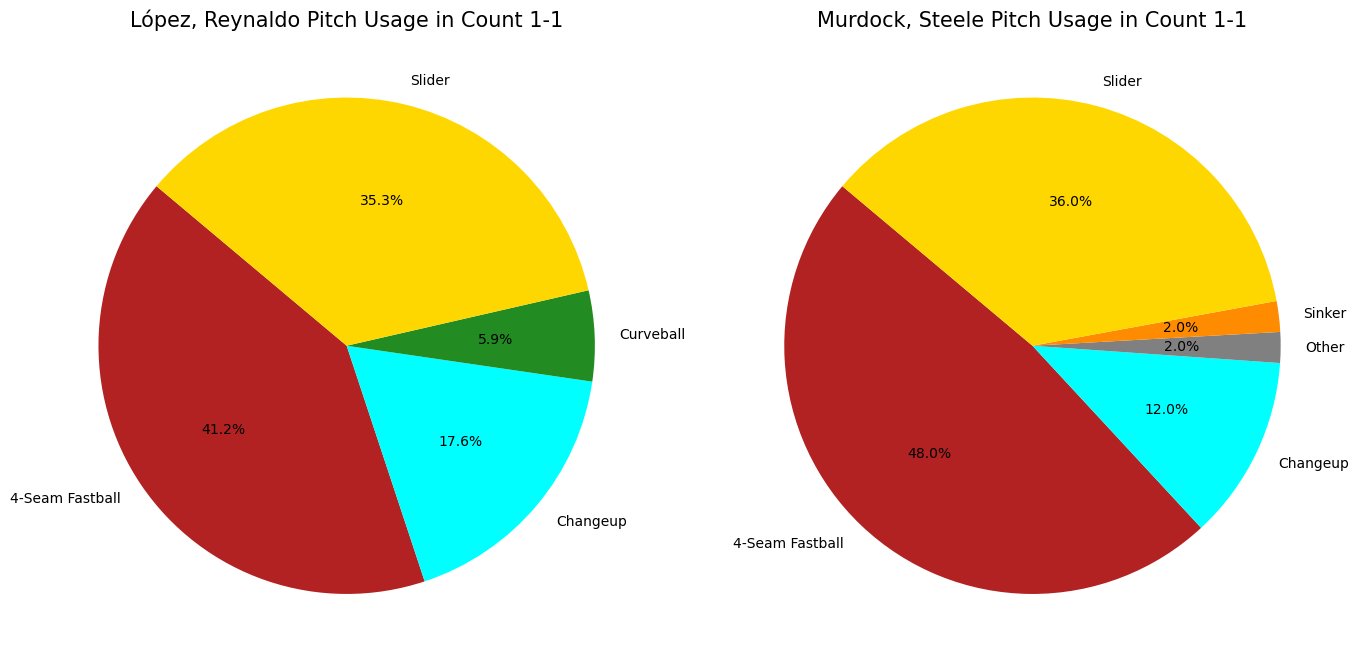

In [27]:
import matplotlib.pyplot as plt

def compare_pitch_usage(ucsd_pitcher, mlb_pitcher, count = '0-0'):
    '''
    Compares the pitch usage of a UCSD pitcher and an MLB pitcher for a given count.
    '''
    
    #Get mlb pitcher pitch stats
    get_count = pitcher_lookup_stats(mlb_pitcher, 0)
    
    #Format current count in a new column
    get_count['current_count'] = list(get_count['balls'].astype(str) + '-' + get_count['strikes'].astype(str))
    
    mlb_count = get_count.groupby(['current_count', 'pitch_name']).agg(
        num_pitches = ('player_name', 'count')
    ).reset_index()
    
    mlb_temp = mlb_count.groupby('current_count').agg(
        total_count_pitches = ('num_pitches', 'sum')).reset_index()
    
    mlb_count_grouped = mlb_count.merge(mlb_temp, on = ['current_count'], how = 'left')
    mlb_count_grouped['usage%_in_count'] = round(mlb_count_grouped['num_pitches'] / mlb_count_grouped['total_count_pitches'] * 100, 1)
    mlb_count_filtered = mlb_count_grouped[mlb_count_grouped['current_count'] == count].copy()

    
    #Get ucsd pitcher pitch stats
    get_count_ucsd = trackman[trackman['Pitcher'] == ucsd_pitcher].copy()
    
    get_count_ucsd['current_count'] = list(get_count_ucsd['Balls'].astype(str) + '-' + get_count_ucsd['Strikes'].astype(str)) 
    
    ucsd_count = get_count_ucsd.groupby(['current_count', 'TaggedPitchType']).agg(
        num_pitches = ('Pitcher', 'count')
    ).reset_index()
    
    ucsd_temp = ucsd_count.groupby('current_count').agg(
        total_count_pitches = ('num_pitches', 'sum')).reset_index()
    
    ucsd_count_grouped = ucsd_count.merge(ucsd_temp, on = ['current_count'], how = 'left')
    ucsd_count_grouped['usage%_in_count'] = round(ucsd_count_grouped['num_pitches'] / ucsd_count_grouped['total_count_pitches'] * 100, 1)
    ucsd_count_filtered = ucsd_count_grouped[ucsd_count_grouped['current_count'] == count].copy()
    
    ucsd_pivot_count = ucsd_count_grouped.pivot(index='current_count', columns='TaggedPitchType', values='usage%_in_count').fillna(0)
    mlb_pivot_count = mlb_count_grouped.pivot(index='current_count', columns='pitch_name', values='usage%_in_count').fillna(0)
    display(ucsd_pivot_count)
    display(mlb_pivot_count)
    
    #Unified color map list
    mlb_pitches = list(mlb_count_filtered['pitch_name'].unique())
    ucsd_pitches = list(ucsd_count_filtered['TaggedPitchType'].unique())

    all_pitches = mlb_pitches + ucsd_pitches
    
    # --- Create a consistent color map ---
    color_pitch_map = {
        '4-Seam Fastball': 'firebrick',
        'Sinker': 'darkorange',
        'Cutter': 'teal',
        'Changeup': 'cyan',
        'Slider': 'gold',
        'Curveball': 'forestgreen',
        'Sweeper': 'indigo',
        'Split Finger': 'orchid',
        'TwoSeamFastball': 'gray',
        'Slow Curve': 'gray',
        'Knuckleball': 'gray',
        'Other': 'gray'
    }
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # MLB pie
    axs[0].pie(
        mlb_count_filtered['usage%_in_count'],
        labels=mlb_count_filtered['pitch_name'],
        autopct='%1.1f%%',
        startangle=140,
        colors= [color_pitch_map.get(pt, 'gray') for pt in mlb_count_filtered['pitch_name']]
    )
    axs[0].set_title(f"{mlb_pitcher} Pitch Usage in Count {count}", fontsize = 15)

    # UCSD pie
    axs[1].pie(
        ucsd_count_filtered['usage%_in_count'],
        labels=ucsd_count_filtered['TaggedPitchType'],
        autopct='%1.1f%%',
        startangle=140,
        colors= [color_pitch_map.get(pt, 'gray') for pt in ucsd_count_filtered['TaggedPitchType']]
    )
    axs[1].set_title(f"{ucsd_pitcher} Pitch Usage in Count {count}", fontsize = 15)

    plt.tight_layout()
    plt.show()
    
compare_pitch_usage('Murdock, Steele', 'López, Reynaldo', count = '1-1')